# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from scipy.stats import zscore
from sklearn.impute import SimpleImputer


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
# laptop ku gk kuat cuy data aslinya 400k :)
df = pd.read_csv('https://raw.githubusercontent.com/ftthalmhdi/depression/refs/heads/main/Dataset_inisiasi.csv')
df = df.sample(n=10000,random_state=42)

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
print("Statistik Deskriptif pada data ", df.head())
print("Jumlah Kolom dan Baris pada Data: ", df.shape)

Statistik Deskriptif pada data                   Name  Age Marital Status    Education Level  \
412375   Raymond Ryan   39       Divorced        High School   
102926   Heather King   61        Widowed        High School   
263517  Ryan Chambers   29         Single   Associate Degree   
202924     Riley Mata   22         Single  Bachelor's Degree   
316613   Monica Brown   21         Single  Bachelor's Degree   

        Number of Children Smoking Status Physical Activity Level  \
412375                   3     Non-smoker               Sedentary   
102926                   2     Non-smoker               Sedentary   
263517                   0        Current               Sedentary   
202924                   0         Former                  Active   
316613                   0         Former                  Active   

       Employment Status    Income Alcohol Consumption Dietary Habits  \
412375          Employed  35061.68                 Low      Unhealthy   
102926        Unemploy

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 412375 to 169984
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          10000 non-null  object 
 1   Age                           10000 non-null  int64  
 2   Marital Status                10000 non-null  object 
 3   Education Level               10000 non-null  object 
 4   Number of Children            10000 non-null  int64  
 5   Smoking Status                10000 non-null  object 
 6   Physical Activity Level       10000 non-null  object 
 7   Employment Status             10000 non-null  object 
 8   Income                        10000 non-null  float64
 9   Alcohol Consumption           10000 non-null  object 
 10  Dietary Habits                10000 non-null  object 
 11  Sleep Patterns                10000 non-null  object 
 12  History of Mental Illness     10000 non-null  object 
 13  

In [5]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"Kolom: {col}")
    print(df[col].value_counts())  # Menampilkan jenis object unik dan jumlahnya
    print("-" * 50)  # Pembatas antar kolom

Kolom: Name
Name
Jennifer Hernandez    6
Matthew Smith         5
Kimberly Smith        5
Robert Williams       5
David Smith           5
                     ..
Sean Smith            1
Nicholas Lee          1
Amber Smith           1
Charles Pearson       1
Abigail Miller        1
Name: count, Length: 9429, dtype: int64
--------------------------------------------------
Kolom: Marital Status
Marital Status
Married     5788
Single      1737
Widowed     1675
Divorced     800
Name: count, dtype: int64
--------------------------------------------------
Kolom: Education Level
Education Level
Bachelor's Degree    2934
High School          2911
Associate Degree     1981
Master's Degree      1782
PhD                   392
Name: count, dtype: int64
--------------------------------------------------
Kolom: Smoking Status
Smoking Status
Non-smoker    5896
Former        2855
Current       1249
Name: count, dtype: int64
--------------------------------------------------
Kolom: Physical Activity Leve

In [6]:
missing_values = df.isnull().sum()
print("Missing Values pada Data: ", missing_values)

Missing Values pada Data:  Name                            0
Age                             0
Marital Status                  0
Education Level                 0
Number of Children              0
Smoking Status                  0
Physical Activity Level         0
Employment Status               0
Income                          0
Alcohol Consumption             0
Dietary Habits                  0
Sleep Patterns                  0
History of Mental Illness       0
History of Substance Abuse      0
Family History of Depression    0
Chronic Medical Conditions      0
dtype: int64


In [7]:
df.describe()

,Age,Number of Children,Income
count,10000.000000,10000.000000,10000.000000
mean,48.965100,1.307700,50745.879641
std,18.144129,1.244177,40085.452336
min,18.000000,0.000000,18.140000
25%,33.000000,0.000000,21592.250000
50%,49.000000,1.000000,38040.395000
75%,65.000000,2.000000,76044.420000
max,80.000000,4.000000,208576.440000


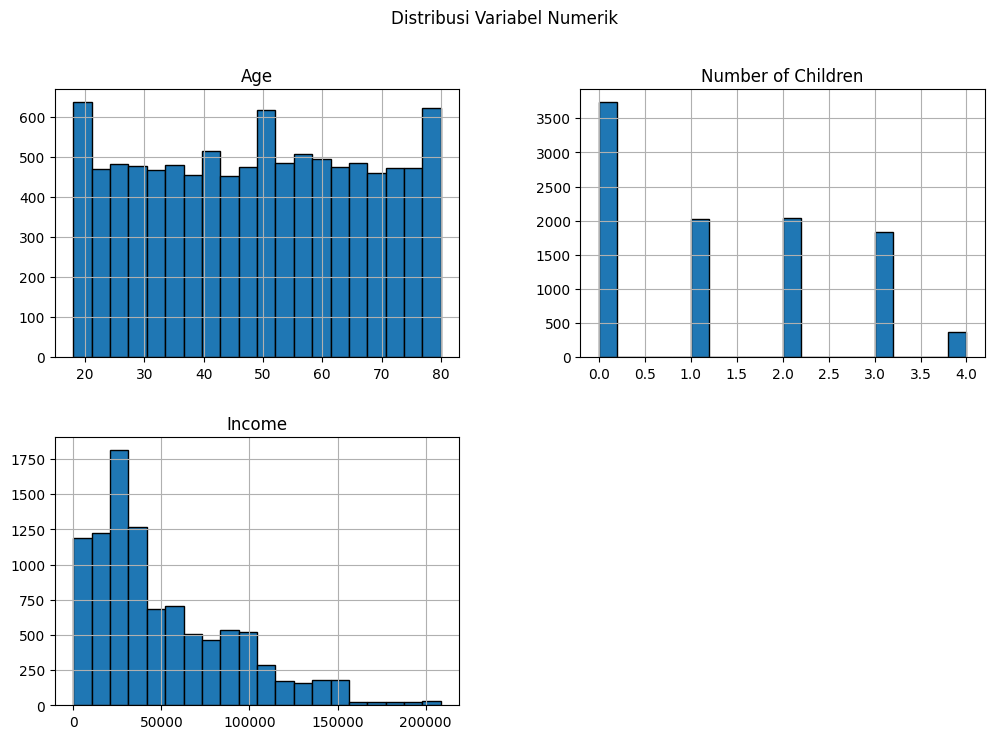

In [8]:
df.hist(figsize=(12, 8),bins=20,edgecolor='black')
plt.suptitle("Distribusi Variabel Numerik")
plt.show()

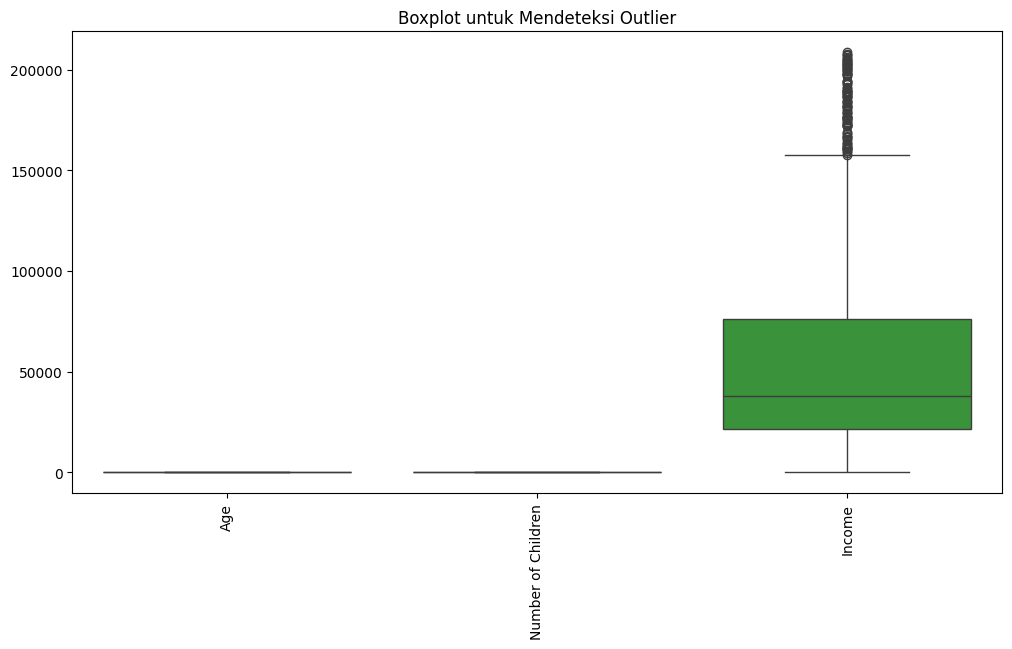

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Boxplot untuk Mendeteksi Outlier")
plt.xticks(rotation=90)
plt.show()

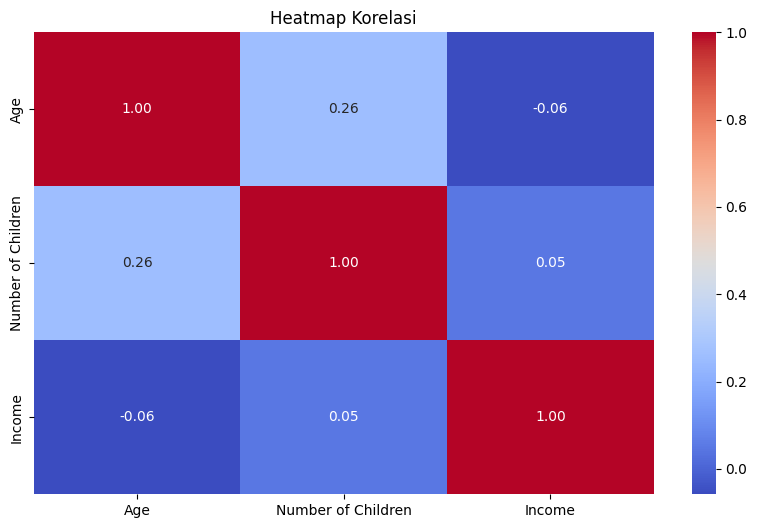

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', fmt='.2f') # Select only numeric columns for correlation
plt.title("Heatmap Korelasi")
plt.show()

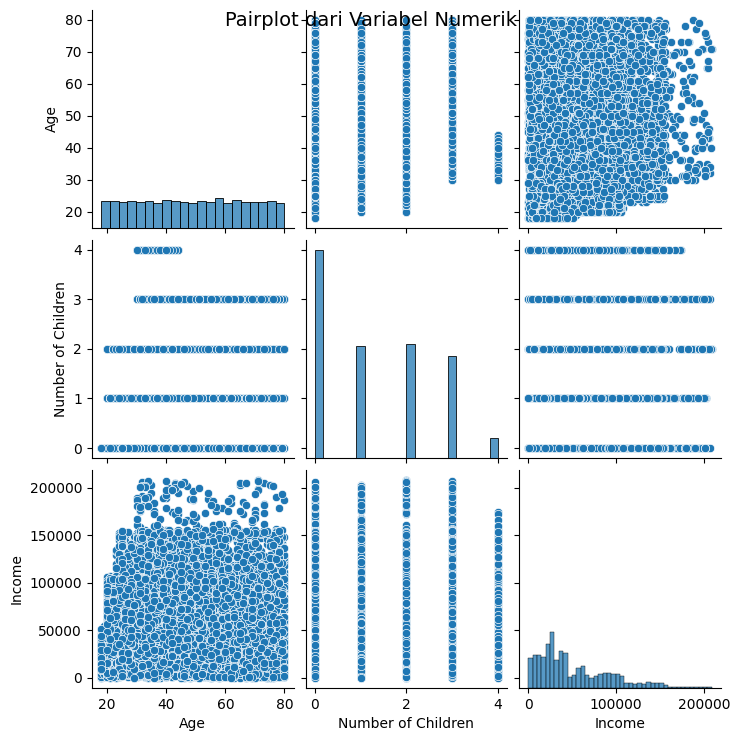

In [11]:
# Pairplot untuk melihat hubungan antar variabel
num_cols = df.select_dtypes(include=np.number).columns
sns.pairplot(df[num_cols])
plt.suptitle("Pairplot dari Variabel Numerik", fontsize=14)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [12]:
df.duplicated().sum()

0

In [13]:
# Mengatasi missing values
df = df.dropna()

In [14]:
not_relevant_cols = ['Name']
df = df.drop(columns=[col for col in not_relevant_cols if col in df.columns], errors="ignore")

In [15]:
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [16]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.select_dtypes(include=['number']))

In [17]:
z_scores = np.abs(zscore(df_scaled))
mask = (z_scores < 3).all(axis=1)
df_scaled = df_scaled[mask]

df = df.iloc[mask.nonzero()[0]]

In [18]:
bins = [0, 18, 35, 50, 65, float('inf')]
labels = ['Remaja', 'Dewasa Muda', 'Dewasa', 'Paruh Baya', 'Lansia']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [19]:
n = 4
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

kmeans = KMeans(n_clusters=n, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_pca)

print("Cluster Labels:\n", df['Cluster'].value_counts())

unique_clusters = df["Cluster"].unique()
print("Cluster yang ditemukan dalam data:", unique_clusters)


Cluster Labels:
 Cluster
1    3295
3    2623
0    2453
2    1541
Name: count, dtype: int64
Cluster yang ditemukan dalam data: [1 0 2 3]


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

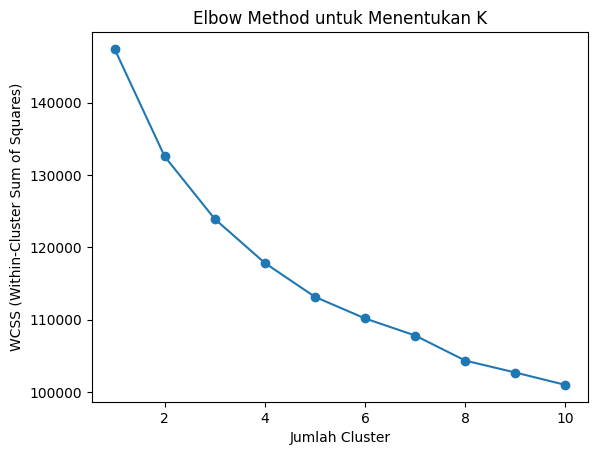

In [20]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method untuk Menentukan K')
plt.show()

In [21]:
# Evaluasi clustering
sil_score = silhouette_score(df_scaled, df['Cluster'])
print(f'Silhouette Score: {sil_score:.4f}')

Silhouette Score: 0.0695


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [22]:
df_numeric = df.select_dtypes(include=['number'])

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_numeric)
k=5
n_features = df_scaled.shape[1]
selector = SelectKBest(score_func=f_classif, k=k)
df_selected = selector.fit_transform(df_scaled, KMeans(n_clusters=4).fit_predict(df_scaled))

n_features_after = df_selected.shape[1]
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_selected)
# sebelum feature selection
kmeans_before = KMeans(n_clusters=4, random_state=42)
labels_before = kmeans_before.fit_predict(df_scaled)
silhouette_score_before = silhouette_score(df_scaled, labels_before)

# setelah feature selection
kmeans_after = KMeans(n_clusters=4, random_state=42)
labels_after = kmeans_after.fit_predict(df_pca)
silhouette_score_after = silhouette_score(df_pca, labels_after)

print(f"Jumlah fitur sebelum Feature Selection: {n_features}")
print(f"Jumlah fitur setelah Feature Selection: {n_features_after}")
print(f'Silhouette Score sebelum feature selection: {silhouette_score_before:.4f}')
print(f'Silhouette Score setelah feature selection: {silhouette_score_after:.4f}')
if silhouette_score_after > silhouette_score_before:
    print("Selection feature is working")
else:
    print("Selection feature is not working")

Jumlah fitur sebelum Feature Selection: 16
Jumlah fitur setelah Feature Selection: 5
Silhouette Score sebelum feature selection: 0.1122
Silhouette Score setelah feature selection: 0.5827
Selection feature is working


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

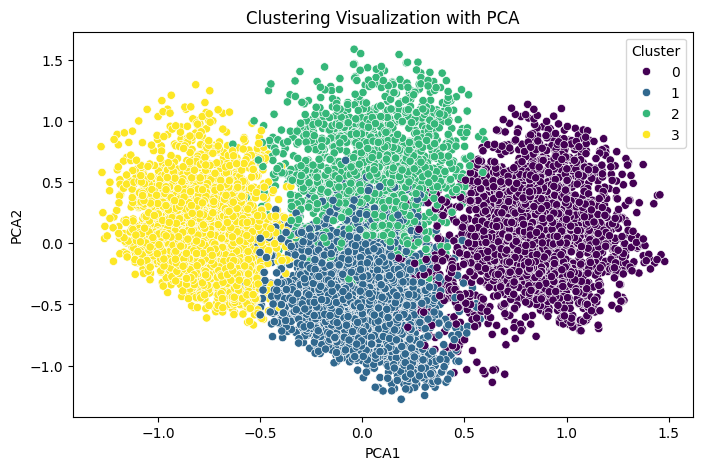

In [23]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)
df['PCA1'] = principal_components[:, 0]
df['PCA2'] = principal_components[:, 1]

plt.figure(figsize=(8, 5))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis')
plt.title('Clustering Visualization with PCA')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [32]:
for col, le in label_encoders.items():
    try:
        df[col] = le.inverse_transform(df[col])
    except ValueError:
        df[col] = df[col].apply(lambda x: le.inverse_transform([x])[0] if x in range(len(le.classes_)) else x)


In [33]:
df.head()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Age_Group,Cluster,PCA1,PCA2
412375,39,Divorced,High School,3,Non-smoker,Sedentary,Employed,35061.68,Low,Unhealthy,Fair,No,No,Yes,No,Dewasa,1,0.180807,-0.989970
102926,61,Widowed,High School,2,Non-smoker,Sedentary,Unemployed,26651.65,Moderate,Unhealthy,Fair,Yes,No,No,Yes,Paruh Baya,0,1.001493,0.454195
263517,29,Single,Associate Degree,0,Current,Sedentary,Employed,37534.30,Low,Unhealthy,Good,No,Yes,No,No,Dewasa Muda,2,-0.490186,-0.115361
202924,22,Single,Bachelor's Degree,0,Former,Active,Employed,58159.44,Low,Healthy,Good,No,No,No,Yes,Dewasa Muda,3,-1.071017,0.576379
316613,21,Single,Bachelor's Degree,0,Former,Active,Unemployed,28167.44,High,Healthy,Fair,Yes,No,No,No,Dewasa Muda,2,-0.127331,0.907185


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

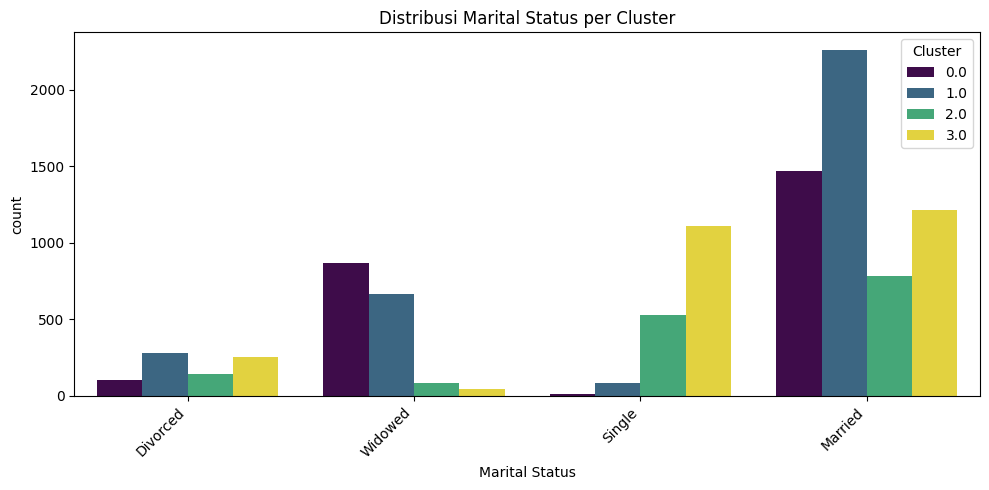


Statistik Deskriptif untuk Marital Status per Cluster:
Marital Status  Divorced  Married  Single  Widowed
Cluster                                           
0.0                 0.04     0.60    0.01     0.35
1.0                 0.09     0.69    0.03     0.20
2.0                 0.09     0.51    0.34     0.05
3.0                 0.10     0.46    0.42     0.02


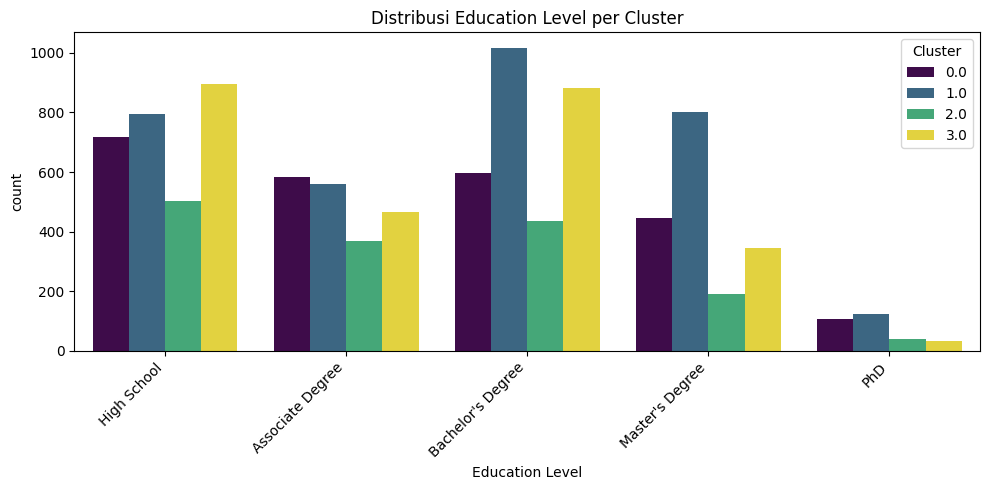


Statistik Deskriptif untuk Education Level per Cluster:
Education Level  Associate Degree  Bachelor's Degree  High School  \
Cluster                                                             
0.0                          0.24               0.24         0.29   
1.0                          0.17               0.31         0.24   
2.0                          0.24               0.28         0.33   
3.0                          0.18               0.34         0.34   

Education Level  Master's Degree   PhD  
Cluster                                 
0.0                         0.18  0.04  
1.0                         0.24  0.04  
2.0                         0.12  0.03  
3.0                         0.13  0.01  


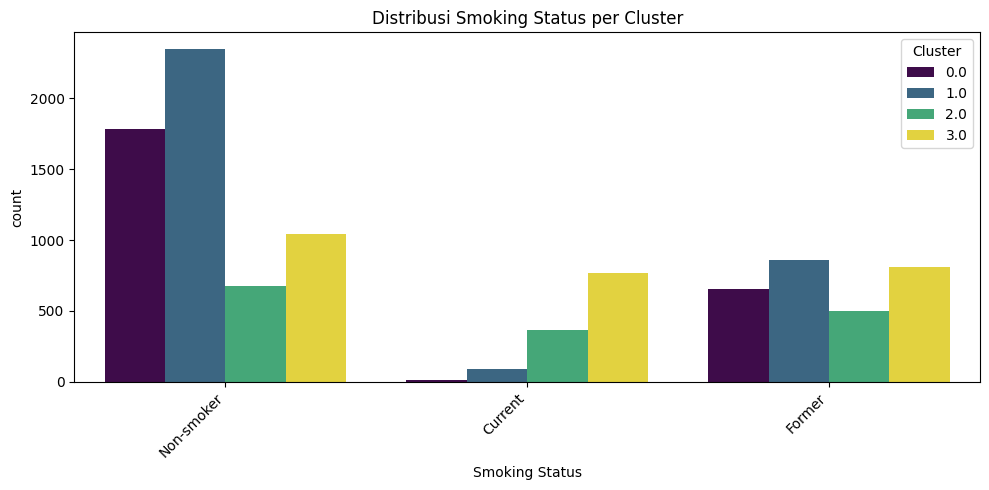


Statistik Deskriptif untuk Smoking Status per Cluster:
Smoking Status  Current  Former  Non-smoker
Cluster                                    
0.0                0.01    0.27        0.73
1.0                0.03    0.26        0.71
2.0                0.23    0.32        0.44
3.0                0.29    0.31        0.40


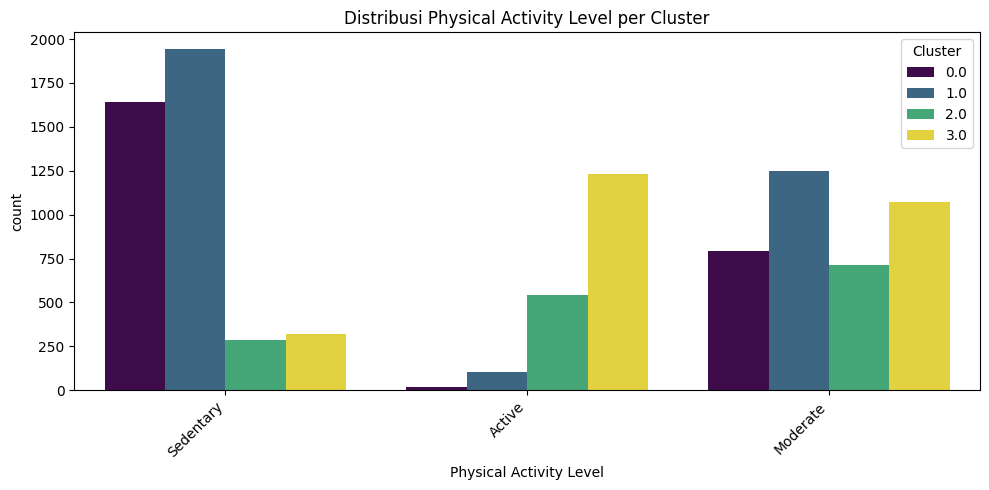


Statistik Deskriptif untuk Physical Activity Level per Cluster:
Physical Activity Level  Active  Moderate  Sedentary
Cluster                                             
0.0                        0.01      0.32       0.67
1.0                        0.03      0.38       0.59
2.0                        0.35      0.46       0.19
3.0                        0.47      0.41       0.12


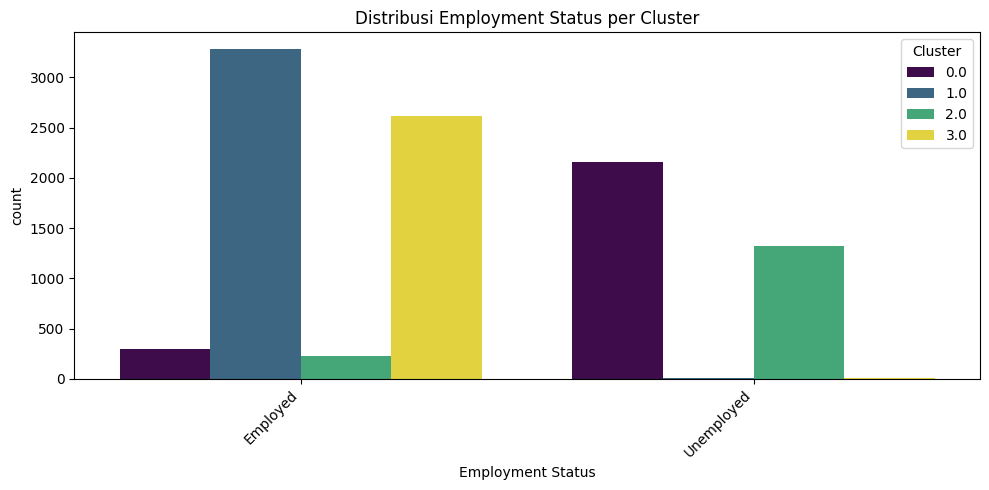


Statistik Deskriptif untuk Employment Status per Cluster:
Employment Status  Employed  Unemployed
Cluster                                
0.0                    0.12        0.88
1.0                    1.00        0.00
2.0                    0.14        0.86
3.0                    1.00        0.00


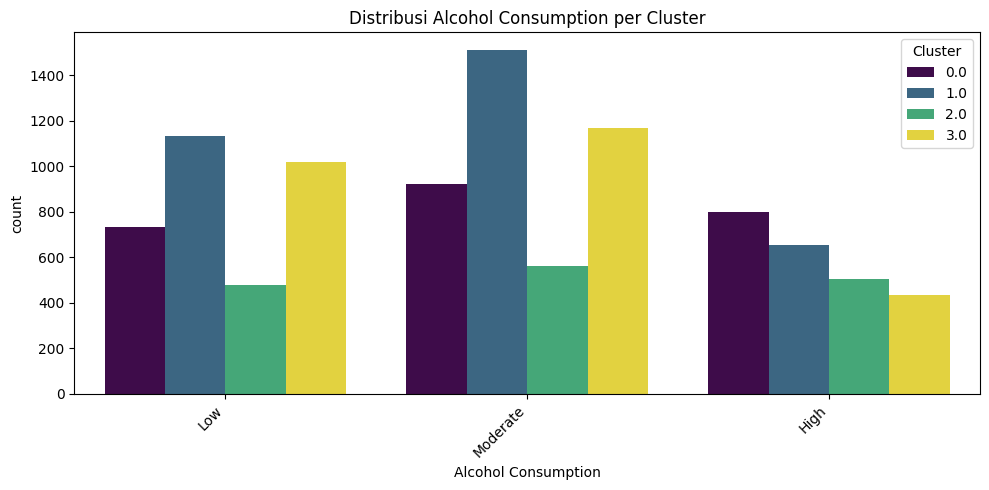


Statistik Deskriptif untuk Alcohol Consumption per Cluster:
Alcohol Consumption  High   Low  Moderate
Cluster                                  
0.0                  0.33  0.30      0.38
1.0                  0.20  0.34      0.46
2.0                  0.33  0.31      0.36
3.0                  0.17  0.39      0.45


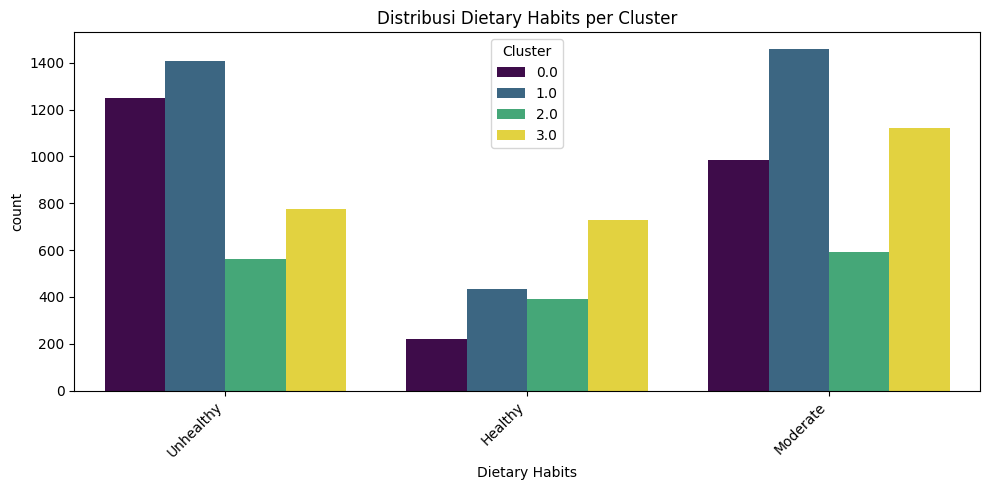


Statistik Deskriptif untuk Dietary Habits per Cluster:
Dietary Habits  Healthy  Moderate  Unhealthy
Cluster                                     
0.0                0.09      0.40       0.51
1.0                0.13      0.44       0.43
2.0                0.25      0.38       0.36
3.0                0.28      0.43       0.30


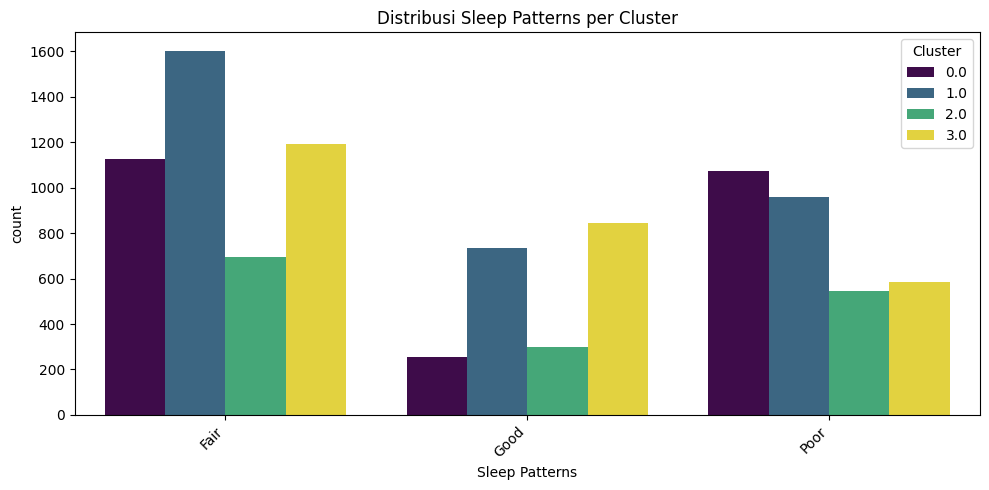


Statistik Deskriptif untuk Sleep Patterns per Cluster:
Sleep Patterns  Fair  Good  Poor
Cluster                         
0.0             0.46  0.10  0.44
1.0             0.49  0.22  0.29
2.0             0.45  0.19  0.35
3.0             0.45  0.32  0.22


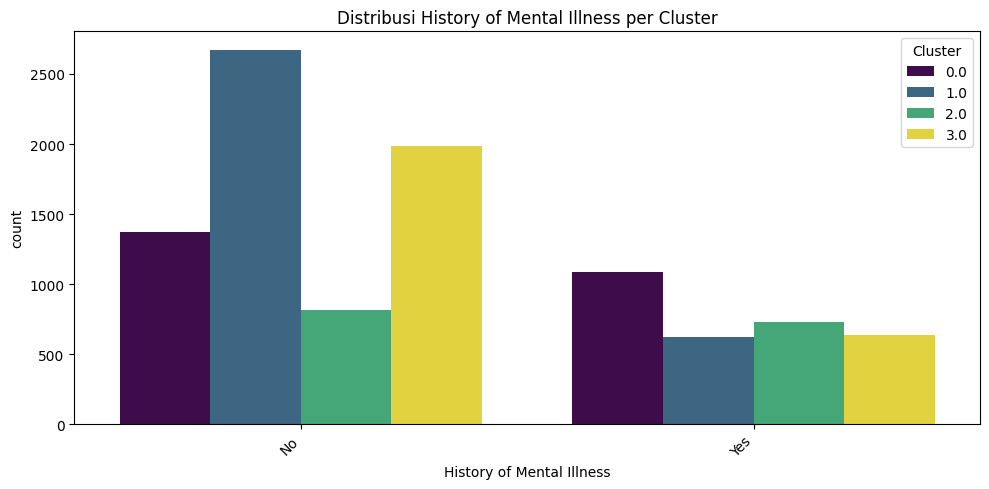


Statistik Deskriptif untuk History of Mental Illness per Cluster:
History of Mental Illness    No   Yes
Cluster                              
0.0                        0.56  0.44
1.0                        0.81  0.19
2.0                        0.53  0.47
3.0                        0.76  0.24


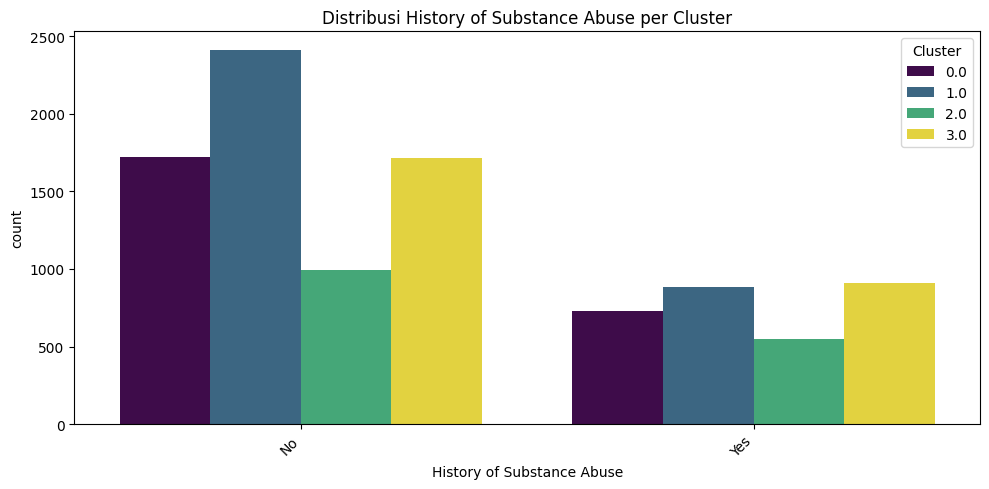


Statistik Deskriptif untuk History of Substance Abuse per Cluster:
History of Substance Abuse    No   Yes
Cluster                               
0.0                         0.70  0.30
1.0                         0.73  0.27
2.0                         0.65  0.35
3.0                         0.65  0.35


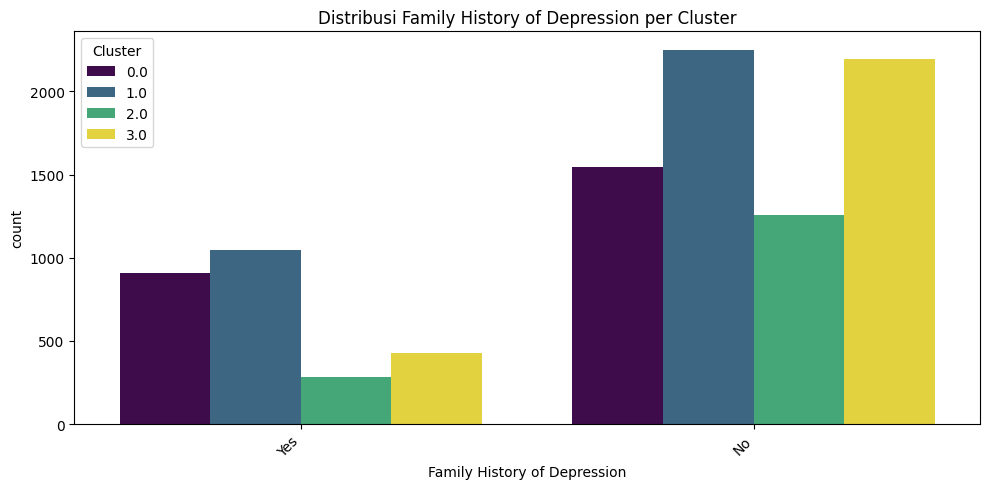


Statistik Deskriptif untuk Family History of Depression per Cluster:
Family History of Depression    No   Yes
Cluster                                 
0.0                           0.63  0.37
1.0                           0.68  0.32
2.0                           0.82  0.18
3.0                           0.84  0.16


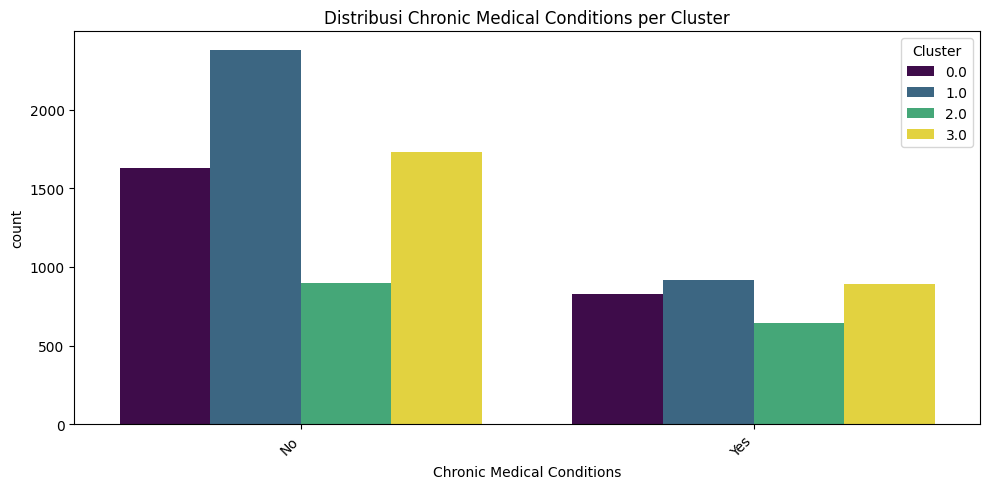


Statistik Deskriptif untuk Chronic Medical Conditions per Cluster:
Chronic Medical Conditions    No   Yes
Cluster                               
0.0                         0.66  0.34
1.0                         0.72  0.28
2.0                         0.58  0.42
3.0                         0.66  0.34


<ipython-input-35-d0cea2fd0dcf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=col, x="Cluster", data=df, ax=axes[0], palette="viridis")


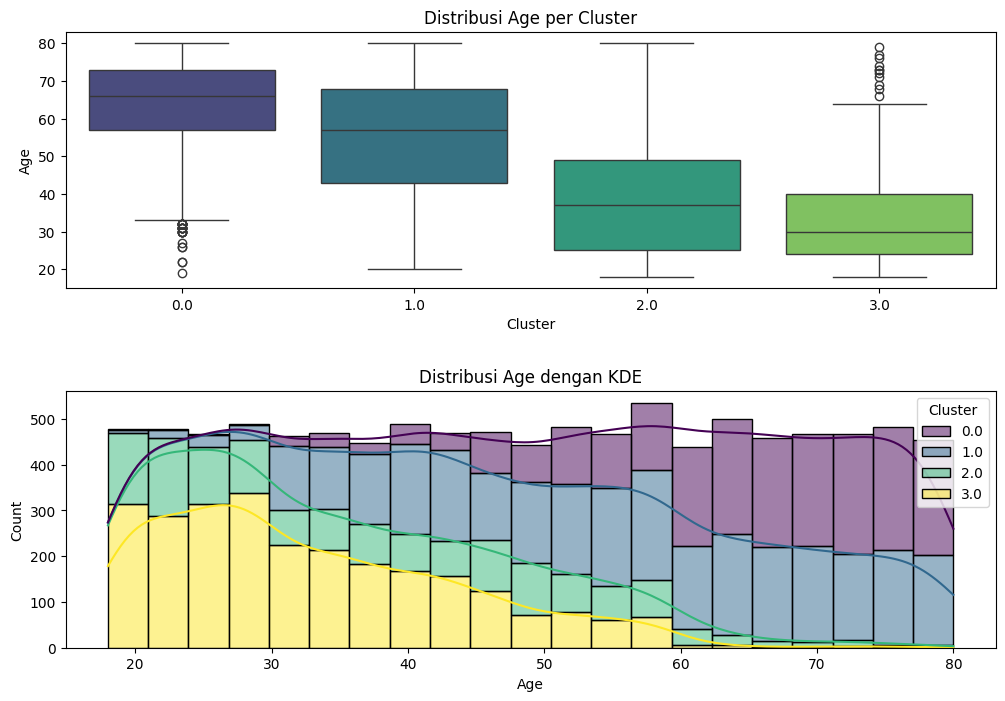

<ipython-input-35-d0cea2fd0dcf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=col, x="Cluster", data=df, ax=axes[0], palette="viridis")


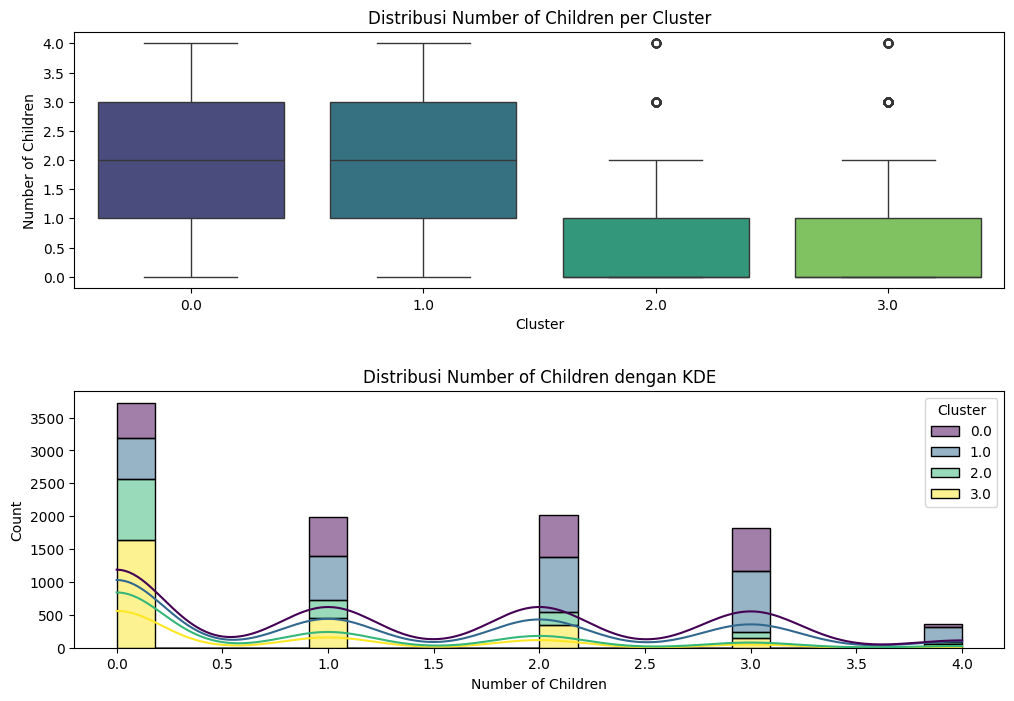

<ipython-input-35-d0cea2fd0dcf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=col, x="Cluster", data=df, ax=axes[0], palette="viridis")


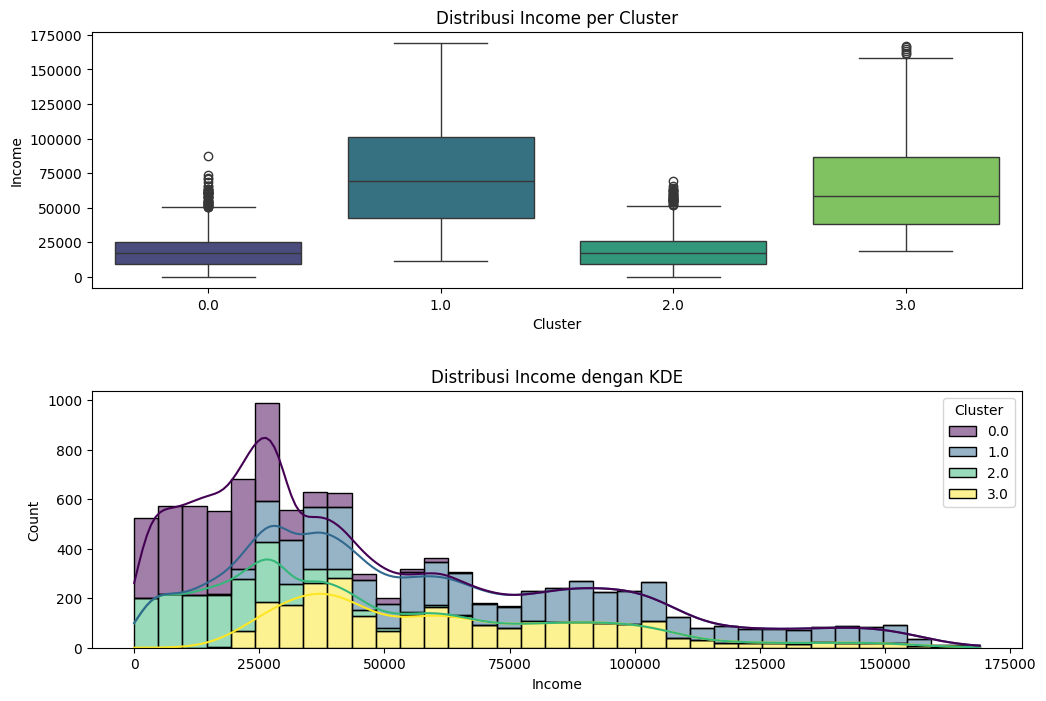

<ipython-input-35-d0cea2fd0dcf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=col, x="Cluster", data=df, ax=axes[0], palette="viridis")


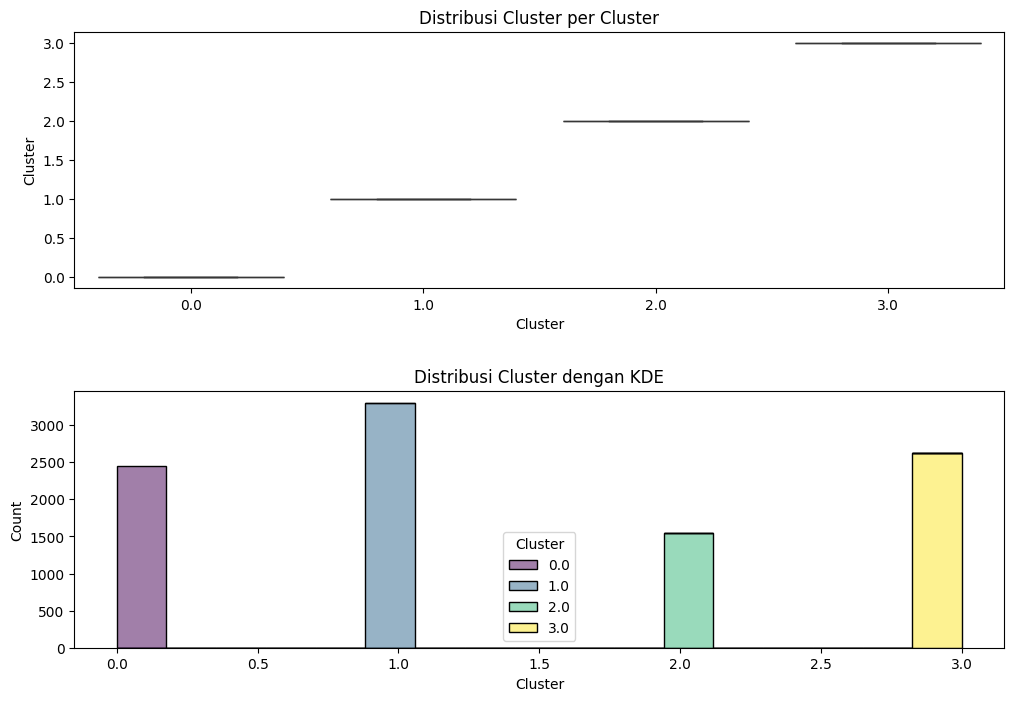

<ipython-input-35-d0cea2fd0dcf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=col, x="Cluster", data=df, ax=axes[0], palette="viridis")


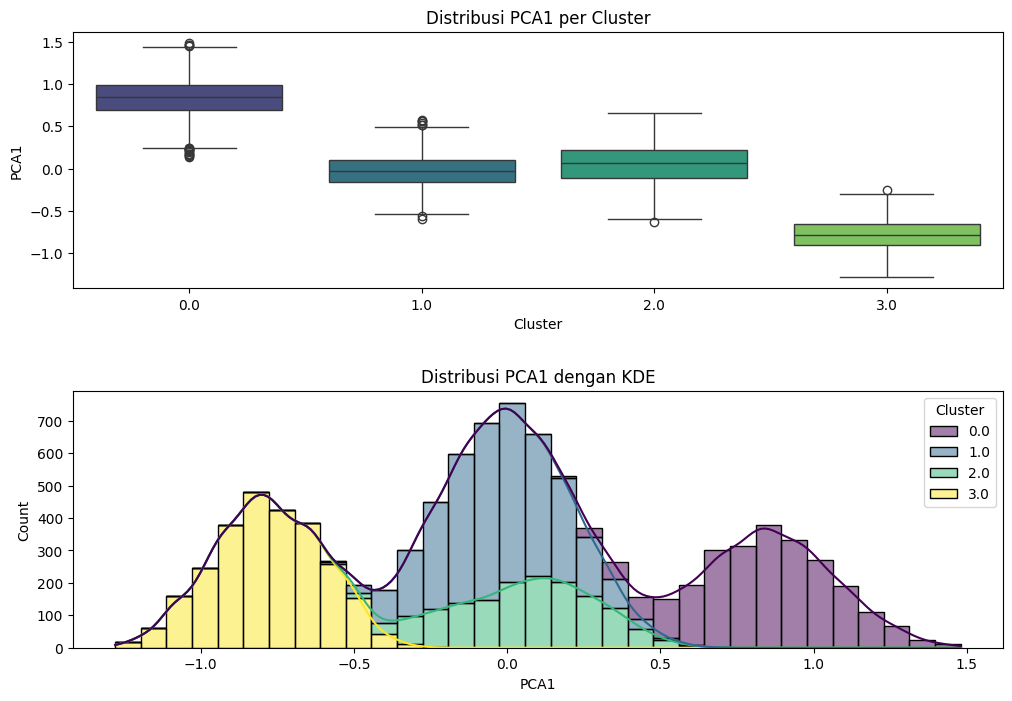

<ipython-input-35-d0cea2fd0dcf>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=col, x="Cluster", data=df, ax=axes[0], palette="viridis")


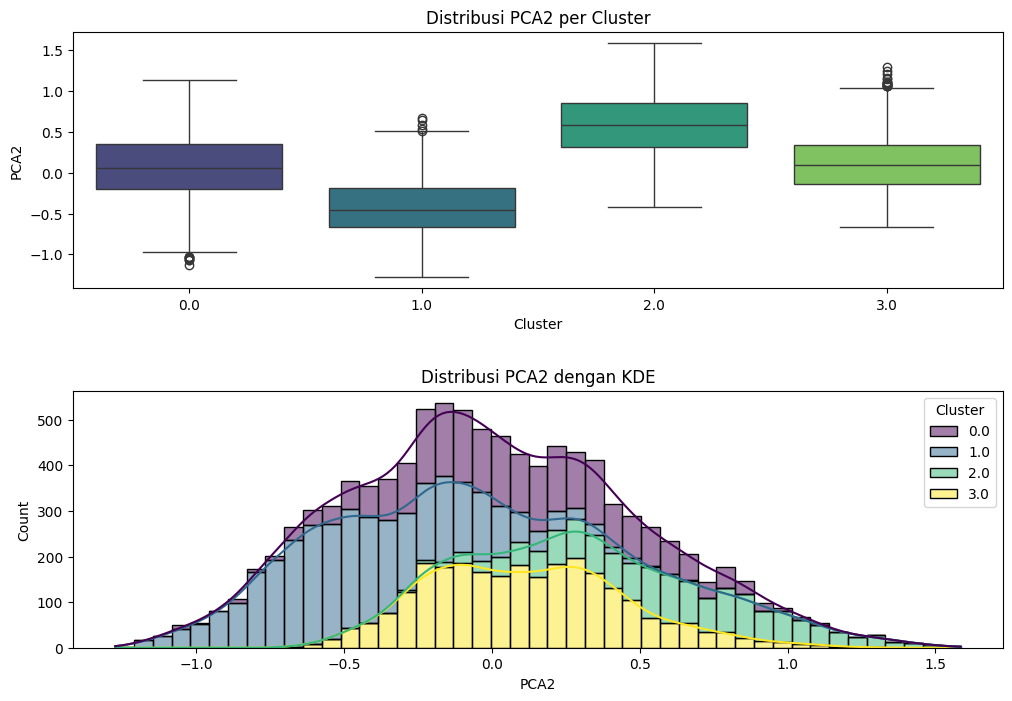

In [35]:
numeric_cols = df.select_dtypes(include=['number']).columns

imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, data=df, hue='Cluster', palette='viridis')
    plt.title(f'Distribusi {col} per Cluster')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    print(f'\nStatistik Deskriptif untuk {col} per Cluster:')
    print(pd.crosstab(df['Cluster'], df[col], normalize='index').round(2))

for col in numeric_cols:
    fig, axes = plt.subplots(2, 1, figsize=(12, 8), gridspec_kw={'hspace': 0.4})

    sns.boxplot(y=col, x="Cluster", data=df, ax=axes[0], palette="viridis")
    axes[0].set_title(f"Distribusi {col} per Cluster")

    sns.histplot(df, x=col, hue="Cluster", multiple="stack", kde=True, palette="viridis", ax=axes[1])
    axes[1].set_title(f"Distribusi {col} dengan KDE")

    plt.show()

Tulis hasil interpretasinya di sini.
## **Cluster 0 (Populasi Rentan dengan Gaya Hidup Tidak Sehat dan Kesehatan Mental Buruk)**  

- **Status Pernikahan:** 60% menikah, 35% janda/duda, 4% bercerai, 1% lajang  
- **Tingkat Pendidikan:** 29% SMA, 24% Sarjana, 24% Diploma, 18% Master, 4% PhD  
- **Status Merokok:** 73% non-smoker, 27% mantan perokok, 1% perokok aktif  
- **Status Pekerjaan:** 88% pengangguran, 12% bekerja  
- **Konsumsi Alkohol:** 38% moderate, 30% rendah, 33% tinggi  
- **Pola Makan:** 51% tidak sehat, 40% sedang, 9% sehat  
- **Pola Tidur:** 46% fair, 44% buruk, 10% baik  
- **Riwayat Penyakit Mental:** 44% memiliki riwayat penyakit mental  
- **Riwayat Penyalahgunaan Zat:** 30% memiliki riwayat penyalahgunaan zat  
- **Riwayat Depresi Keluarga:** 37% memiliki riwayat depresi dalam keluarga  
- **Kondisi Medis Kronis:** 34% memiliki kondisi medis kronis

## **Cluster 1 (Populasi Berpendidikan dengan Status Ekonomi Stabil dan Gaya Hidup Seimbang)**  

- **Status Pernikahan:** 69% menikah, 20% janda/duda, 9% bercerai, 3% lajang  
- **Tingkat Pendidikan:** 31% Sarjana, 24% Master, 17% Diploma, 24% SMA, 4% PhD  
- **Status Merokok:** 71% non-smoker, 26% mantan perokok, 3% perokok aktif  
- **Status Pekerjaan:** 100% bekerja  
- **Konsumsi Alkohol:** 46% moderate, 34% rendah, 20% tinggi  
- **Pola Makan:** 44% sedang, 43% tidak sehat, 13% sehat  
- **Pola Tidur:** 49% fair, 29% buruk, 22% baik  
- **Riwayat Penyakit Mental:** 19% memiliki riwayat penyakit mental  
- **Riwayat Penyalahgunaan Zat:** 27% memiliki riwayat penyalahgunaan zat  
- **Riwayat Depresi Keluarga:** 32% memiliki riwayat depresi dalam keluarga  
- **Kondisi Medis Kronis:** 28% memiliki kondisi medis kronis  
- **Jumlah Data:** -  


## **Cluster 2 (Populasi Muda dengan Risiko Kesehatan Mental dan Gaya Hidup Kurang Sehat)**  

- **Status Pernikahan:** 51% menikah, 34% lajang, 9% bercerai, 5% janda/duda  
- **Tingkat Pendidikan:** 33% SMA, 28% Sarjana, 24% Diploma, 12% Master, 3% PhD  
- **Status Merokok:** 44% non-smoker, 32% mantan perokok, 23% perokok aktif  
- **Status Pekerjaan:** 86% pengangguran, 14% bekerja  
- **Konsumsi Alkohol:** 36% moderate, 31% rendah, 33% tinggi  
- **Pola Makan:** 38% sedang, 36% tidak sehat, 25% sehat  
- **Pola Tidur:** 45% fair, 35% buruk, 19% baik  
- **Riwayat Penyakit Mental:** 47% memiliki riwayat penyakit mental  
- **Riwayat Penyalahgunaan Zat:** 35% memiliki riwayat penyalahgunaan zat  
- **Riwayat Depresi Keluarga:** 18% memiliki riwayat depresi dalam keluarga  
- **Kondisi Medis Kronis:** 42% memiliki kondisi medis kronis  
- **Jumlah Data:** -  

## **Cluster 3 (Populasi Berpendidikan Tinggi dengan Gaya Hidup Sehat dan Ekonomi Stabil)**  

- **Status Pernikahan:** 46% menikah, 42% lajang, 10% bercerai, 2% janda/duda  
- **Tingkat Pendidikan:** 34% Sarjana, 18% Master, 34% SMA, 13% Diploma, 1% PhD  
- **Status Merokok:** 40% non-smoker, 31% mantan perokok, 29% perokok aktif  
- **Status Pekerjaan:** 100% bekerja  
- **Konsumsi Alkohol:** 45% moderate, 39% rendah, 17% tinggi  
- **Pola Makan:** 43% sedang, 30% tidak sehat, 28% sehat  
- **Pola Tidur:** 45% fair, 22% buruk, 32% baik  
- **Riwayat Penyakit Mental:** 24% memiliki riwayat penyakit mental  
- **Riwayat Penyalahgunaan Zat:** 35% memiliki riwayat penyalahgunaan zat  
- **Riwayat Depresi Keluarga:** 16% memiliki riwayat depresi dalam keluarga  
- **Kondisi Medis Kronis:** 34% memiliki kondisi medis kronis  
- **Jumlah Data:** -  

# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## **Cluster 0: Populasi Rentan dengan Gaya Hidup Tidak Sehat dan Kesehatan Mental Buruk**  
- **Persentase Menikah:** 60%  
- **Persentase Pengangguran:** 88%  
- **Persentase Perokok Aktif:** 1%  
- **Persentase Konsumsi Alkohol Tinggi:** 33%  
- **Persentase Pola Makan Tidak Sehat:** 51%  
- **Persentase Pola Tidur Buruk:** 44%  
- **Persentase dengan Riwayat Penyakit Mental:** 44%  

**Analisis:**  
Cluster ini didominasi oleh individu dengan tingkat pengangguran tinggi dan gaya hidup kurang sehat. Banyak dari mereka memiliki pola makan buruk, tidur yang tidak teratur, serta tingkat konsumsi alkohol yang cukup tinggi. Sebagian besar non-smoker, tetapi tingkat gangguan mental relatif tinggi. Mereka termasuk kelompok rentan yang memiliki risiko lebih besar terhadap masalah kesehatan dan kesejahteraan.  

---

## **Cluster 1: Populasi Berpendidikan dengan Ekonomi Stabil dan Gaya Hidup Seimbang**  
- **Persentase Menikah:** 69%  
- **Persentase Bekerja:** 100%  
- **Persentase Perokok Aktif:** 3%  
- **Persentase Konsumsi Alkohol Tinggi:** 20%  
- **Persentase Pola Makan Tidak Sehat:** 43%  
- **Persentase Pola Tidur Baik:** 22%  
- **Persentase dengan Riwayat Penyakit Mental:** 19%  

**Analisis:**  
Cluster ini mencakup individu dengan pekerjaan tetap dan pendidikan lebih tinggi. Mereka memiliki keseimbangan dalam pola hidup, dengan angka konsumsi alkohol tinggi yang lebih rendah dibanding cluster lainnya. Tingkat kesehatan mental lebih baik, dan pola tidur lebih stabil. Ini menunjukkan kelompok yang lebih mapan dan memiliki gaya hidup yang relatif lebih sehat dibanding cluster lain.  

---

## **Cluster 2: Populasi Muda dengan Risiko Kesehatan Mental dan Gaya Hidup Kurang Sehat**  
- **Persentase Menikah:** 51%  
- **Persentase Pengangguran:** 86%  
- **Persentase Perokok Aktif:** 23%  
- **Persentase Konsumsi Alkohol Tinggi:** 33%  
- **Persentase Pola Makan Tidak Sehat:** 36%  
- **Persentase Pola Tidur Buruk:** 35%  
- **Persentase dengan Riwayat Penyakit Mental:** 47%  

**Analisis:**  
Kelompok ini lebih didominasi oleh individu muda yang masih banyak menganggur dan cenderung memiliki gaya hidup kurang sehat. Tingkat merokok dan konsumsi alkohol relatif tinggi, serta banyak yang memiliki gangguan mental. Mereka berisiko mengalami masalah kesehatan jika pola hidup ini tidak berubah.  

---

## **Cluster 3: Populasi Berpendidikan Tinggi dengan Gaya Hidup Sehat dan Ekonomi Stabil**  
- **Persentase Menikah:** 46%  
- **Persentase Bekerja:** 100%  
- **Persentase Perokok Aktif:** 29%  
- **Persentase Konsumsi Alkohol Tinggi:** 17%  
- **Persentase Pola Makan Tidak Sehat:** 30%  
- **Persentase Pola Tidur Baik:** 32%  
- **Persentase dengan Riwayat Penyakit Mental:** 24%  

**Analisis:**  
Cluster ini memiliki tingkat pendidikan dan pekerjaan yang lebih tinggi. Meskipun banyak dari mereka merokok, mereka cenderung lebih stabil dalam pola tidur dan memiliki pola makan yang lebih sehat dibanding cluster lainnya. Ini menunjukkan populasi yang lebih mapan dengan keseimbangan gaya hidup yang lebih baik.  

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [36]:
df.to_csv('Dataset_clustering.csv')